In [29]:
%matplotlib inline
import pandas 
import numpy as np
import matplotlib.pyplot as plt


def DrawPlotRuntime(title,data,xlabel,ylabel,file):
    plt.title(title)
    for i in sorted(set(data['Dimension'])):
        x = data.loc[data.Dimension == i]
        plt.plot(x['Threads'], x['RunTime'], marker=".", label="Matrix: {dim}x{dim}".format(dim = i))
    plt.legend();plt.xlabel(xlabel);plt.ylabel(ylabel)
    plt.savefig(file)
    plt.show()

    
def DrawPlotAcceleration(title,data,xlabel,ylabel,file):
    plt.title(title)
    for i in sorted(set(data['Dimension'])):
        x = data.loc[data.Dimension == i]
        one_tread_time = float(x[x.Threads == 1]['RunTime'])
        plt.plot(x['Threads'], one_tread_time / x['RunTime'], marker=".", label="Matrix: {dim}x{dim}".format(dim = i))
    plt.legend();plt.xlabel(xlabel);plt.ylabel(ylabel)
    plt.savefig(file)
    plt.show()
    
def DrawPlotEfficiency(title,data,xlabel,ylabel,file):
    plt.title(title)
    for i in sorted(set(data['Dimension'])):
        x = data.loc[data.Dimension == i]
        one_tread_time = float(x[x.Threads == 1]['RunTime'])
        plt.plot(x['Threads'], one_tread_time / x['RunTime'] / x['Threads'], marker=".", label="Matrix: {dim}x{dim}".format(dim = i))
    plt.legend();plt.xlabel(xlabel);plt.ylabel(ylabel)
    plt.savefig(file)
    plt.show()
    
def ParseData(file):
    parsed_data= pandas.read_csv(file)
    data = parsed_data.groupby(['Threads', 'Dimension'], as_index = False).mean()
    return data


# Home pc 
## intel core i7-7700


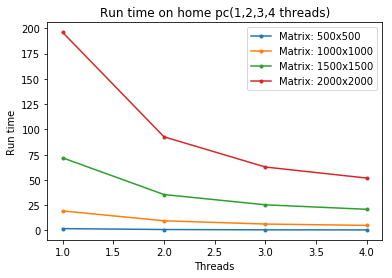

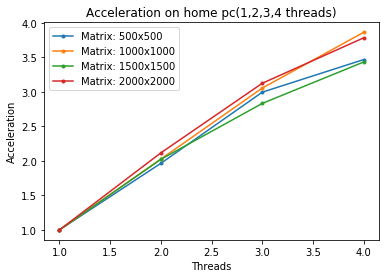

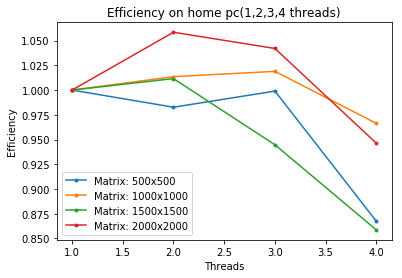

In [30]:
data=ParseData('benchmark_myPc.csv')
DrawPlotRuntime('Run time on home pc(1,2,3,4 threads)',data,'Threads','Run time','RuntimeMypc.png')
DrawPlotAcceleration('Acceleration on home pc(1,2,3,4 threads)',data,'Threads','Acceleration','AccelerationMypc.png')
DrawPlotEfficiency('Efficiency on home pc(1,2,3,4 threads)',data,'Threads','Efficiency','EfficiencyMypc.png')

# Narfu pc
## intel ...

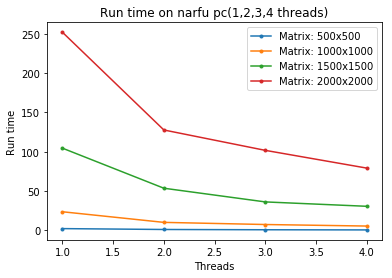

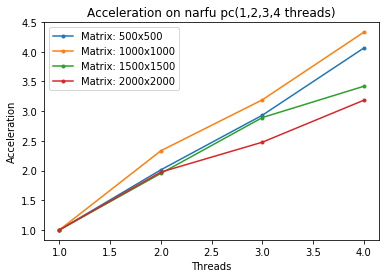

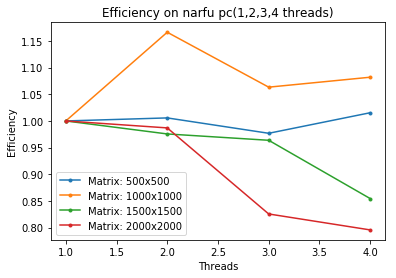

In [31]:
data=ParseData('benchmark_NarfuPc.csv')
DrawPlotRuntime('Run time on narfu pc(1,2,3,4 threads)',data,'Threads','Run time','RuntimeNarfupc.png')
DrawPlotAcceleration('Acceleration on narfu pc(1,2,3,4 threads)',data,'Threads','Acceleration','AccelerationNarfupc.png')
DrawPlotEfficiency('Efficiency on narfu pc(1,2,3,4 threads)',data,'Threads','Efficiency','EfficiencyNarfupc.png')

# Cluster Narfu

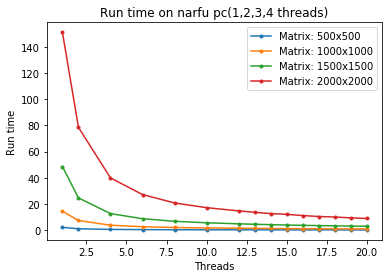

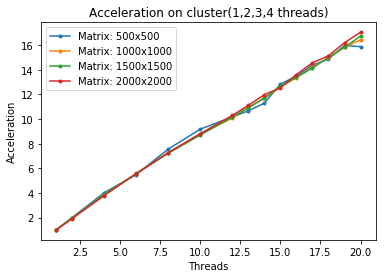

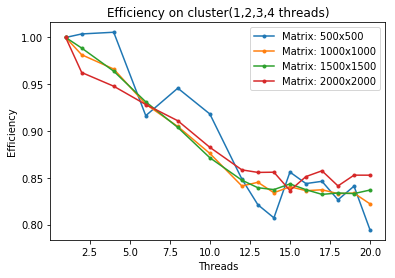

In [32]:
data=ParseData('benchmark_cluster.csv')
DrawPlotRuntime('Run time on narfu pc(1,2,3,4 threads)',data,'Threads','Run time','RuntimeCluster.png')
DrawPlotAcceleration('Acceleration on cluster(1,2,3,4 threads)',data,'Threads','Acceleration','AccelerationCluster.png')
DrawPlotEfficiency('Efficiency on cluster(1,2,3,4 threads)',data,'Threads','Efficiency','EfficiencyCluster.png')